#Introduction
---

In this project, you will compile an Exploratory Data Analysis using Python of our e-commerce dataset. This notebook contains the starter code to import the data using Pandas.

You will need to run each block of code in the setup section, each time you open the notebook, in order to work on your analysis.

#Setup
---
We set up our Colab by installing, importing, and enabling the usage of a few Python libraries within Colab, as well as authenticating this Colab runtime and then setting up a BigQuery client with the appropriate Cloud project_id. This follows closely the instructions in the ["Getting started with BigQuery"](https://colab.sandbox.google.com/notebooks/bigquery.ipynb#scrollTo=SeTJb51SKs_W)
example Colab.

In [2]:
#@title Install Latest Version of Some Packages
!pip install --upgrade chart_studio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 3.3 MB/s eta 0:00:00


***Check the output from the cell above, as it may require restarting the Colab runtime for the upgrades to take effect in the environment. You can pick up from this point after restarting.***

In [3]:
#@title Import Python Libraries & Some Other Setup
# Basic Python data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable displaying pandas data frames as interactive tables by default
from google.colab import data_table
data_table.enable_dataframe_formatter()

The authentication step in the next cell will require manually going through some pop-up screens and copy/pasting an authentication code from another window back into the cell to complete (on the 1st run; may run automatically thereafter).

In [4]:
#@title Provide Google Credentials to Colab Runtime (May Require Manually Copy/Pasting Authentication Code)
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated



##Please enter your own Google Cloud/BigQuery project ID in the form below, then run the cell to set up the BigQuery client.
1. Visit the [GCP console](https://console.cloud.google.com) and copy the project id field.
2. If you haven't set up BigQuery and don't have a project ID to enter, follow Remy's instructions [here](https://introtogcode.slack.com/archives/C07JABBBU74/p1728489799749529)
3. Fill in the project ID where it says 'YOUR PROJECT ID HERE' below

In [ ]:
#This is Dharaa's project ID
from google.cloud import bigquery
client = bigquery.Client(project='inventory-management-b120f')


In [ ]:
#This is Epiphany's project ID
from google.cloud import bigquery
client = bigquery.Client(project='logical-iridium-441918-g9')

In [ ]:
#This is Elizabeth's project ID
from google.cloud import bigquery
client = bigquery.Client(project='eseymour-gcode-python-project')

In [5]:
#This is Arianna's project ID
from google.cloud import bigquery
client = bigquery.Client(project='gcode-441218')

#Pull in e-commerce data
----
In this section, we look at how to get each table in our e-commerce dataset. The commented out code at the end can be uncommented for an individual line to see a sample of the data.

In [6]:
sql_query = """ SELECT * FROM bigquery-public-data.thelook_ecommerce.distribution_centers """
distribution_centers = client.query(sql_query).to_dataframe()
sql_query = """ SELECT * FROM bigquery-public-data.thelook_ecommerce.events """
events = client.query(sql_query).to_dataframe()
sql_query = """ SELECT * FROM bigquery-public-data.thelook_ecommerce.inventory_items """
inventory_items = client.query(sql_query).to_dataframe()
sql_query = """ SELECT * FROM bigquery-public-data.thelook_ecommerce.order_items """
order_items = client.query(sql_query).to_dataframe()
sql_query = """ SELECT * FROM bigquery-public-data.thelook_ecommerce.orders """
orders = client.query(sql_query).to_dataframe()
sql_query = """ SELECT * FROM bigquery-public-data.thelook_ecommerce.products """
products = client.query(sql_query).to_dataframe()
sql_query = """ SELECT * FROM bigquery-public-data.thelook_ecommerce.users """
users = client.query(sql_query).to_dataframe()

Explore the data: uncomment out whichever line to view the first 5 entries in any of the tables.

In [ ]:
distribution_centers.head()
#events.head()
#inventory_items.head()
#order_items.head()
#orders.head()
#products.head()
users.describe()

,id,age,latitude,longitude
count,100000.0,100000.0,100000.000000,100000.000000
mean,50000.5,41.00173,28.259471,24.676054
std,28867.657797,17.028574,22.075427,89.981251
min,1.0,12.0,-43.160756,-158.164931
25%,25000.75,26.0,26.057472,-51.037757
50%,50000.5,41.0,35.230242,4.525656
75%,75000.25,56.0,40.711555,116.360365
max,100000.0,70.0,64.865194,153.560238


**USERS**

In [ ]:
#ANALYSIS ON USERS
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   id              100000 non-null  Int64              
 1   first_name      100000 non-null  object             
 2   last_name       100000 non-null  object             
 3   email           100000 non-null  object             
 4   age             100000 non-null  Int64              
 5   gender          100000 non-null  object             
 6   state           100000 non-null  object             
 7   street_address  100000 non-null  object             
 8   postal_code     100000 non-null  object             
 9   city            100000 non-null  object             
 10  country         100000 non-null  object             
 11  latitude        100000 non-null  float64            
 12  longitude       100000 non-null  float64            
 13  traffic_source 

In [ ]:
users.describe()

,id,age,latitude,longitude
count,100000.0,100000.0,100000.000000,100000.000000
mean,50000.5,41.00173,28.259471,24.676054
std,28867.657797,17.028574,22.075427,89.981251
min,1.0,12.0,-43.160756,-158.164931
25%,25000.75,26.0,26.057472,-51.037757
50%,50000.5,41.0,35.230242,4.525656
75%,75000.25,56.0,40.711555,116.360365
max,100000.0,70.0,64.865194,153.560238


In [ ]:
users['user_name'] = users['first_name'] + " " +users['last_name']
users.head()

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at,user_geom,user_name
0,80931,Kevin,Donaldson,kevindonaldson@example.net,68,M,Acre,9448 Duke Road,69980-000,null,Brasil,-8.065346,-72.870949,Search,2024-01-12 12:10:00+00:00,POINT(-72.87094866 -8.065346116),Kevin Donaldson
1,44391,Nicole,Vaughn,nicolevaughn@example.com,18,F,Acre,4872 Anderson Motorway,69980-000,null,Brasil,-8.065346,-72.870949,Email,2019-08-12 06:47:00+00:00,POINT(-72.87094866 -8.065346116),Nicole Vaughn
2,12480,Christopher,Downs,christopherdowns@example.net,44,M,Acre,62576 Robert Burg Suite 181,69980-000,null,Brasil,-8.065346,-72.870949,Search,2022-11-11 04:54:00+00:00,POINT(-72.87094866 -8.065346116),Christopher Downs
3,37529,Bradley,Perry,bradleyperry@example.com,45,M,Acre,3898 Wilson Valley Apt. 826,69980-000,null,Brasil,-8.065346,-72.870949,Search,2021-10-06 17:53:00+00:00,POINT(-72.87094866 -8.065346116),Bradley Perry
4,24953,Kevin,Perez,kevinperez@example.org,66,M,Acre,03100 Taylor Squares Suite 394,69980-000,null,Brasil,-8.065346,-72.870949,Search,2023-02-13 00:40:00+00:00,POINT(-72.87094866 -8.065346116),Kevin Perez


In [ ]:
users['traffic_source'].value_counts()

,count
traffic_source,
Search,69984
Organic,14818
Facebook,6076
Email,5007
Display,4115


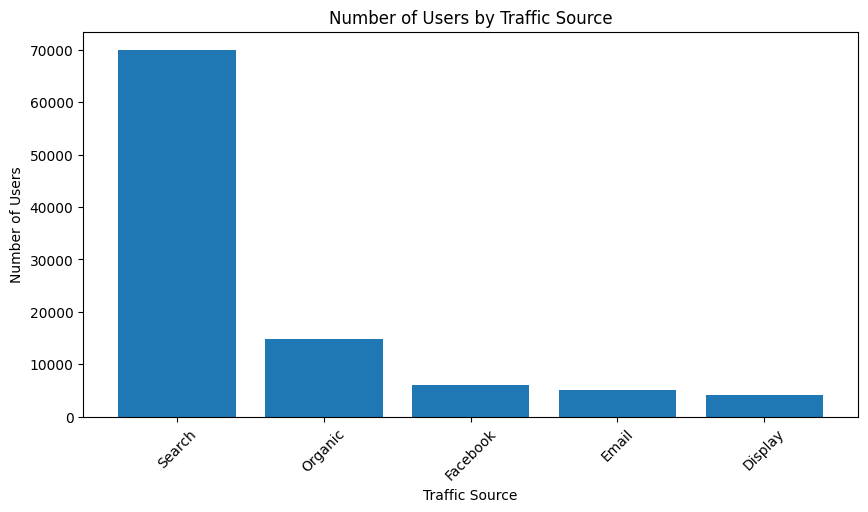

In [ ]:
plt.figure(figsize=(10, 5)) # x, y
plt.bar(users['traffic_source'].value_counts().index, users['traffic_source'].value_counts().values)
plt.xlabel("Traffic Source")
plt.ylabel("Number of Users")
plt.title("Number of Users by Traffic Source")
plt.xticks(rotation=45) # Rotate x-axis labels
plt.show()

Text(0.5, 1.0, 'Number of Users by Traffic Source - Pie Chart')

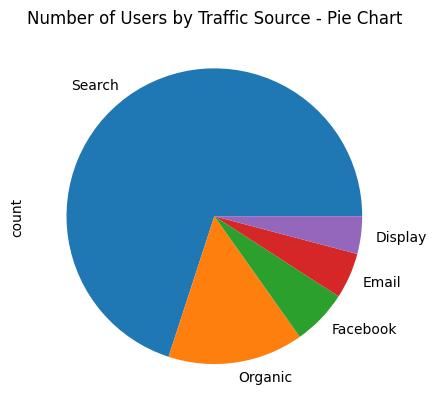

In [ ]:
users['traffic_source'].value_counts().plot(kind='pie')
plt.title("Number of Users by Traffic Source - Pie Chart")

In [ ]:
#which city has the most users
city_count=users['city'].value_counts()
print(city_count)

city
Shanghai            2447
Beijing             2100
Seoul               1501
Shenzhen            1275
null                 982
                    ... 
Engins                 1
Mutilva Baja           1
Corralejo              1
Costa Calma            1
Porta Westfalica       1
Name: count, Length: 7877, dtype: int64


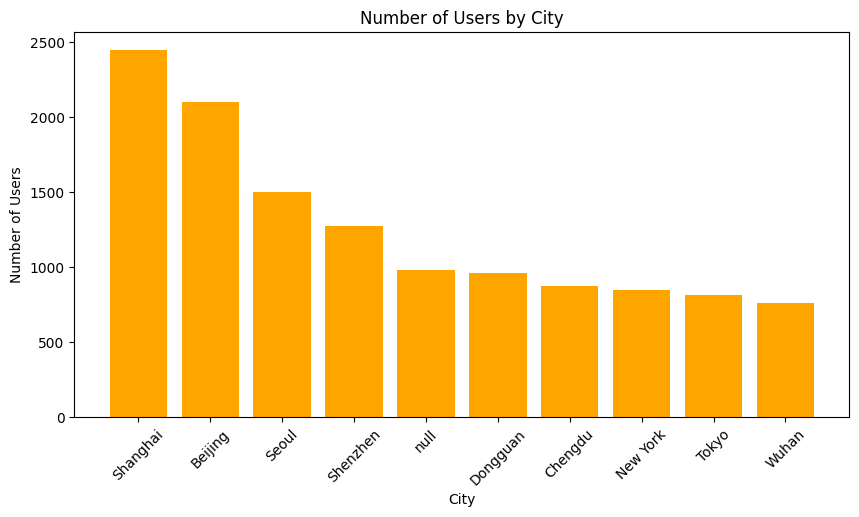

In [ ]:

topcities = 10  # Or any desired number
city_count = city_count[:topcities]
plt.figure(figsize=(10, 5)) # x, y
plt.bar(city_count.index, city_count.values, color='orange')
plt.xlabel("City")
plt.ylabel("Number of Users")
plt.title("Number of Users by City")
plt.xticks(rotation=45) # Rotate x-axis labels
plt.show()

In [ ]:
#avg age in each traffic source
avg_age_by_traffic_source = users.groupby('traffic_source')['age'].mean()
print(avg_age_by_traffic_source)

traffic_source
Display     41.531227
Email       41.029359
Facebook    41.192396
Organic      41.16345
Search      40.917824
Name: age, dtype: Float64


Text(0.5, 1.0, 'Average Age by Traffic Source')

<Figure size 1000x500 with 0 Axes>

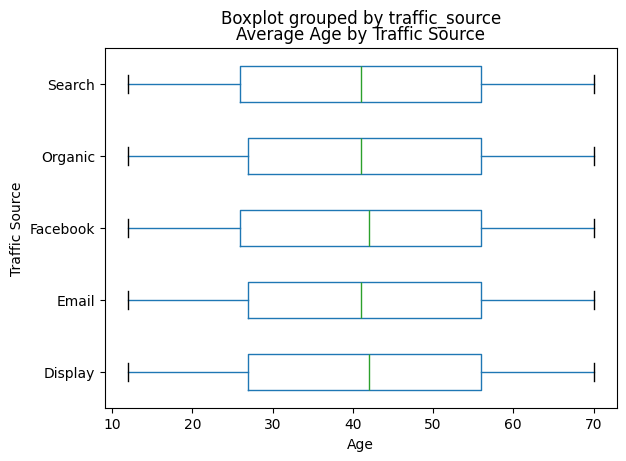

In [ ]:
plt.figure(figsize=(10, 5))
users.boxplot(column='age', by='traffic_source', vert=False)
plt.grid(False)
plt.xlabel('Age')
plt.ylabel('Traffic Source')
plt.title('Average Age by Traffic Source')

In [ ]:
#demographic of our users
users['gender'].value_counts()

,count
gender,
M,50046
F,49954


Text(0.5, 1.0, 'Number of Users by Gender - Pie Chart')

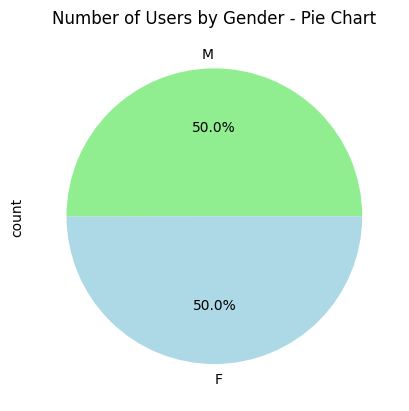

In [ ]:
#demographic of our users pie chart?
users['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightblue'])
plt.title("Number of Users by Gender - Pie Chart")

**DISTRIBUTION CENTERS**

In [ ]:
#ANALYSIS ON DISTRIBUTION CENTERS
distribution_centers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        10 non-null     Int64  
 1   name                      10 non-null     object 
 2   latitude                  10 non-null     float64
 3   longitude                 10 non-null     float64
 4   distribution_center_geom  10 non-null     object 
dtypes: Int64(1), float64(2), object(2)
memory usage: 538.0+ bytes


In [ ]:
distribution_centers.describe()

,id,latitude,longitude
count,10.0,10.000000,10.000000
mean,5.5,34.679310,-87.938550
std,3.02765,4.572666,12.722916
min,1.0,29.760400,-118.250000
25%,3.25,31.024975,-90.042800
50%,5.5,33.416650,-87.863900
75%,7.75,38.741850,-80.229150
max,10.0,41.836900,-73.783400


In [ ]:
distribution_centers[['name','distribution_center_geom']].describe()

,name,distribution_center_geom
count,10,10
unique,10,10
top,Los Angeles CA,POINT(-118.25 34.05)
freq,1,1


In [ ]:
distribution_centers.head()

,id,name,latitude,longitude,distribution_center_geom
0,4,Los Angeles CA,34.0500,-118.2500,POINT(-118.25 34.05)
1,8,Mobile AL,30.6944,-88.0431,POINT(-88.0431 30.6944)
2,3,Houston TX,29.7604,-95.3698,POINT(-95.3698 29.7604)
3,7,Philadelphia PA,39.9500,-75.1667,POINT(-75.1667 39.95)
4,2,Chicago IL,41.8369,-87.6847,POINT(-87.6847 41.8369)


In [ ]:
distribution_centers['name'].value_counts()
#so creating a visualization of the number of distribution center by region will be useless since there's only 1 per region in this dataset

,count
name,
Los Angeles CA,1
Mobile AL,1
Houston TX,1
Philadelphia PA,1
Chicago IL,1
Savannah GA,1
Memphis TN,1
Port Authority of New York/New Jersey NY/NJ,1
Charleston SC,1


In [ ]:
#ANALYSIS ON USERS & DISTRIBUTION CENTER
users.head()

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at,user_geom,user_name
0,80931,Kevin,Donaldson,kevindonaldson@example.net,68,M,Acre,9448 Duke Road,69980-000,null,Brasil,-8.065346,-72.870949,Search,2024-01-12 12:10:00+00:00,POINT(-72.87094866 -8.065346116),Kevin Donaldson
1,44391,Nicole,Vaughn,nicolevaughn@example.com,18,F,Acre,4872 Anderson Motorway,69980-000,null,Brasil,-8.065346,-72.870949,Email,2019-08-12 06:47:00+00:00,POINT(-72.87094866 -8.065346116),Nicole Vaughn
2,12480,Christopher,Downs,christopherdowns@example.net,44,M,Acre,62576 Robert Burg Suite 181,69980-000,null,Brasil,-8.065346,-72.870949,Search,2022-11-11 04:54:00+00:00,POINT(-72.87094866 -8.065346116),Christopher Downs
3,37529,Bradley,Perry,bradleyperry@example.com,45,M,Acre,3898 Wilson Valley Apt. 826,69980-000,null,Brasil,-8.065346,-72.870949,Search,2021-10-06 17:53:00+00:00,POINT(-72.87094866 -8.065346116),Bradley Perry
4,24953,Kevin,Perez,kevinperez@example.org,66,M,Acre,03100 Taylor Squares Suite 394,69980-000,null,Brasil,-8.065346,-72.870949,Search,2023-02-13 00:40:00+00:00,POINT(-72.87094866 -8.065346116),Kevin Perez


In [ ]:
distribution_centers.head()

,id,name,latitude,longitude,distribution_center_geom
0,4,Los Angeles CA,34.0500,-118.2500,POINT(-118.25 34.05)
1,8,Mobile AL,30.6944,-88.0431,POINT(-88.0431 30.6944)
2,3,Houston TX,29.7604,-95.3698,POINT(-95.3698 29.7604)
3,7,Philadelphia PA,39.9500,-75.1667,POINT(-75.1667 39.95)
4,2,Chicago IL,41.8369,-87.6847,POINT(-87.6847 41.8369)


In [ ]:
merged_df = pd.merge(users, distribution_centers, on='id')
merged_df.head()
customer_dis = merged_df.groupby('name')['age'].mean()
print(customer_dis)
#name:name of the distribution center


name
Charleston SC                                  58.0
Chicago IL                                     49.0
Houston TX                                     68.0
Los Angeles CA                                 15.0
Memphis TN                                     15.0
Mobile AL                                      14.0
New Orleans LA                                 66.0
Philadelphia PA                                42.0
Port Authority of New York/New Jersey NY/NJ    40.0
Savannah GA                                    53.0
Name: age, dtype: Float64


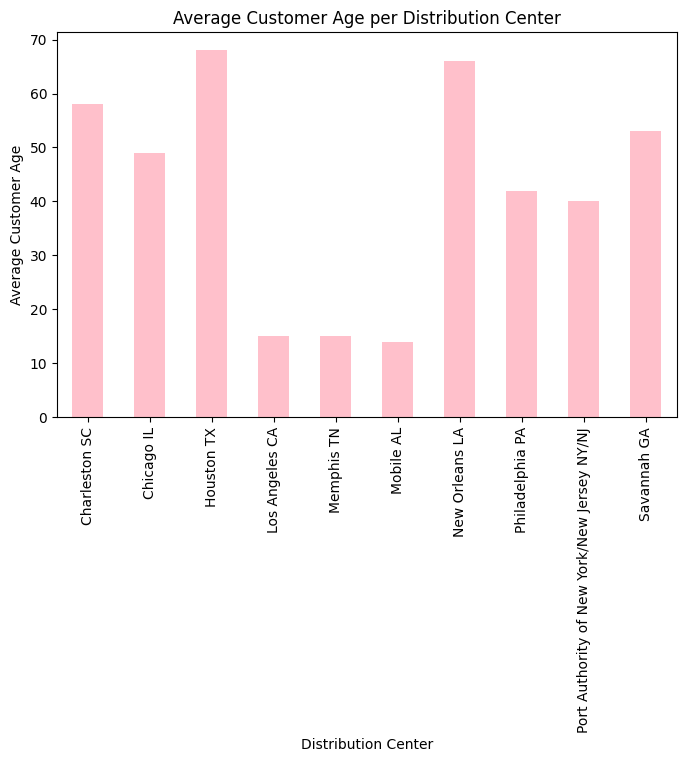

In [ ]:
plt.figure(figsize=(8, 5))
customer_dis.plot(kind='bar', color='pink')
plt.xlabel('Distribution Center')
plt.ylabel('Average Customer Age')
plt.title('Average Customer Age per Distribution Center')
plt.show()

# Orders and Order Items

In [7]:
# order_items information
order_items.info()
# order_items.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181314 entries, 0 to 181313
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   id                 181314 non-null  Int64              
 1   order_id           181314 non-null  Int64              
 2   user_id            181314 non-null  Int64              
 3   product_id         181314 non-null  Int64              
 4   inventory_item_id  181314 non-null  Int64              
 5   status             181314 non-null  object             
 6   created_at         181314 non-null  datetime64[us, UTC]
 7   shipped_at         117811 non-null  datetime64[us, UTC]
 8   delivered_at       63738 non-null   datetime64[us, UTC]
 9   returned_at        18386 non-null   datetime64[us, UTC]
 10  sale_price         181314 non-null  float64            
dtypes: Int64(5), datetime64[us, UTC](4), float64(1), object(1)
memory usage: 16.1+ MB


In [8]:
# orders information
orders.info()
# orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124919 entries, 0 to 124918
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   order_id      124919 non-null  Int64              
 1   user_id       124919 non-null  Int64              
 2   status        124919 non-null  object             
 3   gender        124919 non-null  object             
 4   created_at    124919 non-null  datetime64[us, UTC]
 5   returned_at   12627 non-null   datetime64[us, UTC]
 6   shipped_at    81230 non-null   datetime64[us, UTC]
 7   delivered_at  43927 non-null   datetime64[us, UTC]
 8   num_of_item   124919 non-null  Int64              
dtypes: Int64(3), datetime64[us, UTC](4), object(2)
memory usage: 8.9+ MB


In [9]:
# Join orders and order_items
orders_merged = orders.merge(order_items, on='order_id', suffixes=('_o', '_oi'))

# Remove duplicate columns
orders_merged = orders_merged.loc[:, ('order_id', 'user_id_o', 'status_o', 'gender',
                                      'created_at_o', 'returned_at_o', 'shipped_at_o', 'delivered_at_o',
                                      'num_of_item', 'id', 'product_id', 'inventory_item_id', 'sale_price')]

# Checking
# orders_merged.head()

# Orders and Order Items Analysis

In [10]:
# Total number of orders
# Maximum, minimum, and average amount of items in an order
orders_merged['num_of_item'].describe()

,num_of_item
count,181314.0
mean,1.898916
std,1.061872
min,1.0
25%,1.0
50%,2.0
75%,2.0
max,4.0


In [11]:
# Maximum, minimum, average sales price
orders_merged['sale_price'].describe()

,sale_price
count,181314.000000
mean,59.518717
std,65.979792
min,0.020000
25%,24.750000
50%,39.990002
75%,69.949997
max,999.000000


In [12]:
# Joining to products for further analysis
# products.info()

orders_products = pd.merge(orders_merged, products, left_on='product_id', right_on='id', suffixes=('_om', '_p'))

# Remove duplicate columns
orders_products = orders_products.loc[:, ('order_id', 'user_id_o', 'status_o', 'gender',
                                      'created_at_o', 'returned_at_o', 'shipped_at_o', 'delivered_at_o',
                                      'num_of_item', 'id_om', 'product_id', 'inventory_item_id', 'sale_price',
                                      'id_p', 'cost', 'category', 'name', 'brand', 'department', 'sku', 'distribution_center_id')]

# Checking
# orders_products.info()
# orders_products.head()

In [13]:
# Top Product(s)
orders_merged['product_id'].mode()

,product_id
0,24588


In [14]:
# Find the most commonly ordered items
orders_products.loc[orders_products['product_id'] == 18860]

,order_id,user_id_o,status_o,gender,created_at_o,returned_at_o,shipped_at_o,delivered_at_o,num_of_item,id_om,...,inventory_item_id,sale_price,id_p,cost,category,name,brand,department,sku,distribution_center_id
105205,1750,1433,Complete,M,2024-05-30 18:06:00+00:00,NaT,2024-06-01 10:09:00+00:00,2024-06-02 00:45:00+00:00,1,2557,...,6866,96.0,18860,48.768,Sweaters,Williams Cashmere Men's 100% Cashmere Turtlene...,Williams Cashmere,Men,5D5FBD1CB768AC734508B626A52FA255,2
107039,11748,9414,Complete,M,2019-10-28 00:38:00+00:00,NaT,2019-10-29 17:51:00+00:00,2019-11-01 17:57:00+00:00,1,17128,...,46310,96.0,18860,48.768,Sweaters,Williams Cashmere Men's 100% Cashmere Turtlene...,Williams Cashmere,Men,5D5FBD1CB768AC734508B626A52FA255,2
108536,20123,16135,Complete,M,2024-11-22 17:00:00+00:00,NaT,2024-11-22 17:16:00+00:00,2024-11-27 14:26:00+00:00,3,29256,...,79035,96.0,18860,48.768,Sweaters,Williams Cashmere Men's 100% Cashmere Turtlene...,Williams Cashmere,Men,5D5FBD1CB768AC734508B626A52FA255,2
116606,63784,51189,Complete,M,2024-10-19 08:47:00+00:00,NaT,2024-10-20 22:11:00+00:00,2024-10-24 02:25:00+00:00,1,92775,...,250773,96.0,18860,48.768,Sweaters,Williams Cashmere Men's 100% Cashmere Turtlene...,Williams Cashmere,Men,5D5FBD1CB768AC734508B626A52FA255,2
117930,71169,57039,Complete,M,2025-01-08 02:06:00+00:00,NaT,2025-01-10 21:24:00+00:00,2025-01-13 23:11:00+00:00,1,103478,...,279725,96.0,18860,48.768,Sweaters,Williams Cashmere Men's 100% Cashmere Turtlene...,Williams Cashmere,Men,5D5FBD1CB768AC734508B626A52FA255,2
119021,77480,62012,Complete,M,2024-02-23 18:46:00+00:00,NaT,2024-02-26 02:47:00+00:00,2024-02-29 23:52:00+00:00,2,112655,...,304472,96.0,18860,48.768,Sweaters,Williams Cashmere Men's 100% Cashmere Turtlene...,Williams Cashmere,Men,5D5FBD1CB768AC734508B626A52FA255,2
176731,102913,82294,Shipped,M,2024-09-03 13:09:00+00:00,NaT,2024-09-04 12:07:00+00:00,NaT,4,149463,...,404003,96.0,18860,48.768,Sweaters,Williams Cashmere Men's 100% Cashmere Turtlene...,Williams Cashmere,Men,5D5FBD1CB768AC734508B626A52FA255,2


# Orders and Order Items Charts

In [15]:
# Gender breakdown of orders
gender_grouped_om = orders_merged.groupby('gender')
count_gender = gender_grouped_om.count()
count_gender

,order_id,user_id_o,status_o,created_at_o,returned_at_o,shipped_at_o,delivered_at_o,num_of_item,id,product_id,inventory_item_id,sale_price
gender,,,,,,,,,,,,
F,91375,91375,91375,91375,9113,59445,31887,91375,91375,91375,91375,91375
M,89939,89939,89939,89939,9273,58366,31851,89939,89939,89939,89939,89939


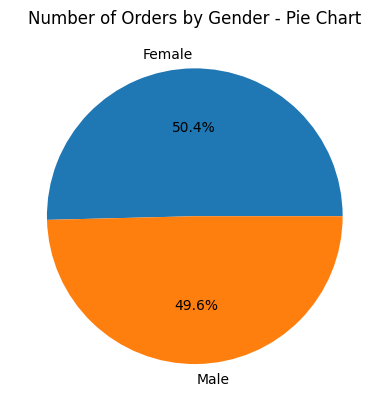

In [16]:
# Gender breakdown of orders Pie Chart
labels = 'Female', 'Male'
plt.pie(orders_merged['gender'].value_counts(), labels=labels, autopct='%1.1f%%')
plt.title("Number of Orders by Gender - Pie Chart")
plt.ylabel('')

plt.show()

In [17]:
# Order Status breakdown of orders
orders_merged['status_o'].value_counts()

,count
status_o,
Shipped,54073
Complete,45352
Processing,36393
Cancelled,27110
Returned,18386


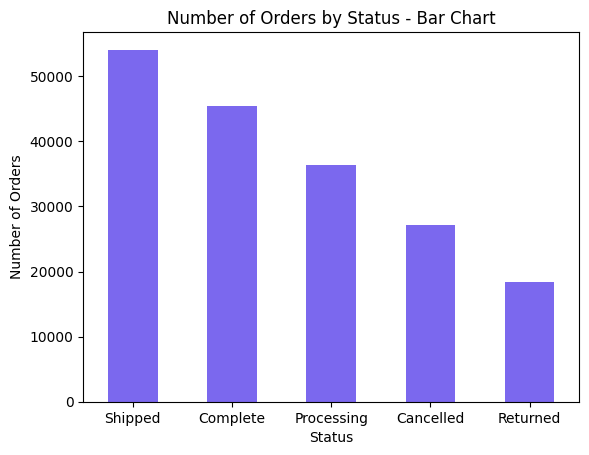

In [18]:
# Order Status breakdown of orders Bar Chart
orders_merged['status_o'].value_counts().plot(kind='bar', color='mediumslateblue')
plt.xlabel('Status')
plt.xticks(rotation='horizontal')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Status - Bar Chart')
plt.show()

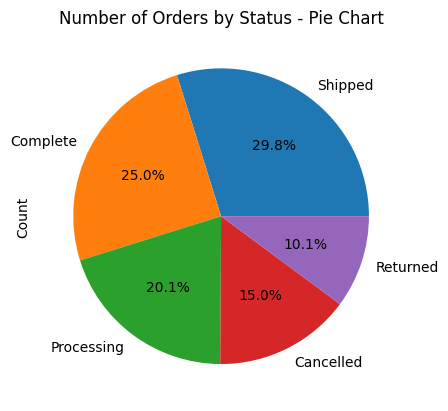

In [19]:
# Order Status breakdown of orders Pie Chart
orders_merged['status_o'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Number of Orders by Status - Pie Chart")
plt.ylabel('Count')

plt.show()

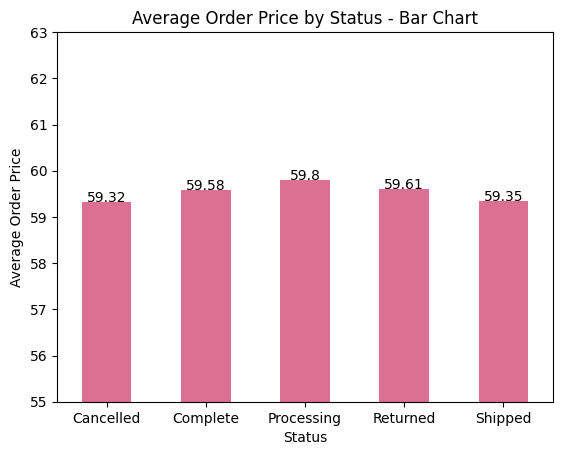

In [20]:
# Average Order Price per order Bar Chart
avg_order_price = orders_merged.groupby('status_o')['sale_price'].mean()
avg_order_price.plot(kind='bar', color='palevioletred')

plt.ylim(55, 63)

for i in range(len(avg_order_price)):
    plt.text(i, avg_order_price.iloc[i], round(avg_order_price.iloc[i], 2), ha='center')

plt.xlabel('Status')
plt.xticks(rotation='horizontal')
plt.ylabel('Average Order Price')
plt.title('Average Order Price by Status - Bar Chart')

plt.show()

# Inventory Items


In [ ]:
#basic exploration of inventory items
inventory_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487521 entries, 0 to 487520
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype              
---  ------                          --------------   -----              
 0   id                              487521 non-null  Int64              
 1   product_id                      487521 non-null  Int64              
 2   created_at                      487521 non-null  datetime64[us, UTC]
 3   sold_at                         180751 non-null  datetime64[us, UTC]
 4   cost                            487521 non-null  float64            
 5   product_category                487521 non-null  object             
 6   product_name                    487521 non-null  object             
 7   product_brand                   487521 non-null  object             
 8   product_retail_price            487521 non-null  float64            
 9   product_department              487521 non-null  object             
 

In [ ]:
#checking for missing data
inventory_items.isnull().sum()

,0
id,0
product_id,0
created_at,0
sold_at,306770
cost,0
product_category,0
product_name,0
product_brand,0
product_retail_price,0
product_department,0


In [ ]:
inventory_items['sold_at'] = pd.to_datetime(inventory_items['sold_at'], errors='coerce')
inventory_items.isnull().sum()

,0
id,0
product_id,0
created_at,0
sold_at,306770
cost,0
product_category,0
product_name,0
product_brand,0
product_retail_price,0
product_department,0


In [ ]:
#identifying unsold items where sold_at is null
unsold_items = inventory_items[inventory_items['sold_at'].isnull()]
print(unsold_items['product_category'].value_counts())  # Count by category
print(unsold_items['product_department'].value_counts())  # Count by department

product_category
Intimates                        22462
Jeans                            21465
Tops & Tees                      20504
Fashion Hoodies & Sweatshirts    19522
Swim                             19460
Sleep & Lounge                   18879
Sweaters                         18702
Shorts                           18221
Accessories                      16637
Active                           15656
Outerwear & Coats                15414
Underwear                        12720
Pants                            12380
Socks                            10700
Dresses                           9377
Maternity                         8683
Suits & Sport Coats               8661
Plus                              7187
Socks & Hosiery                   6299
Pants & Capris                    5908
Leggings                          5428
Blazers & Jackets                 5307
Skirts                            3562
Suits                             1697
Jumpsuits & Rompers               1579
Clothing

<ipython-input-65-5aeb90d697ce>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values,palette='viridis')


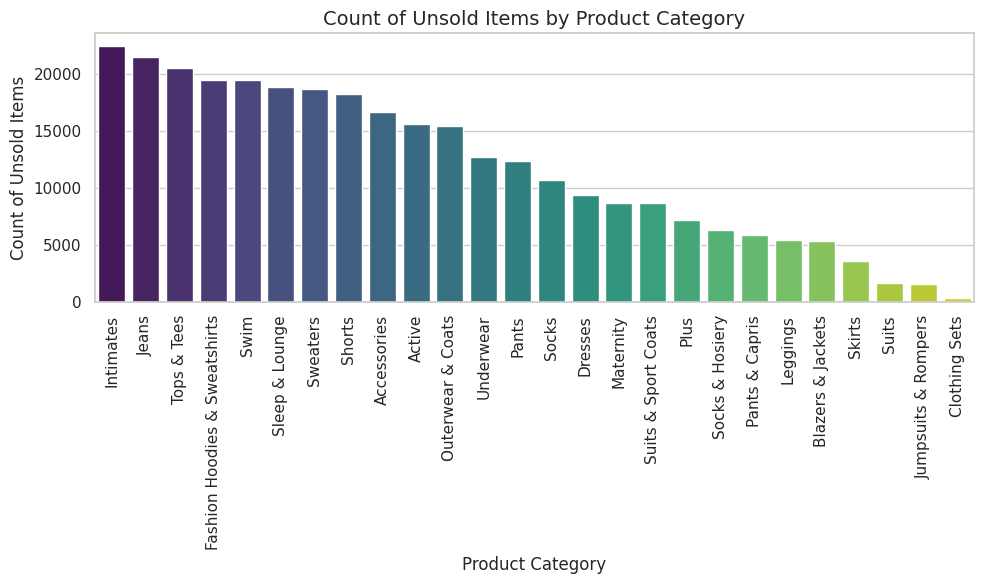

In [ ]:
#bar chart for unsold items

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

category_counts = unsold_items['product_category'].value_counts()

#creating the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values,palette='viridis')
plt.xticks(rotation=90)

plt.title('Count of Unsold Items by Product Category', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Count of Unsold Items', fontsize=12)

plt.tight_layout()
plt.show()

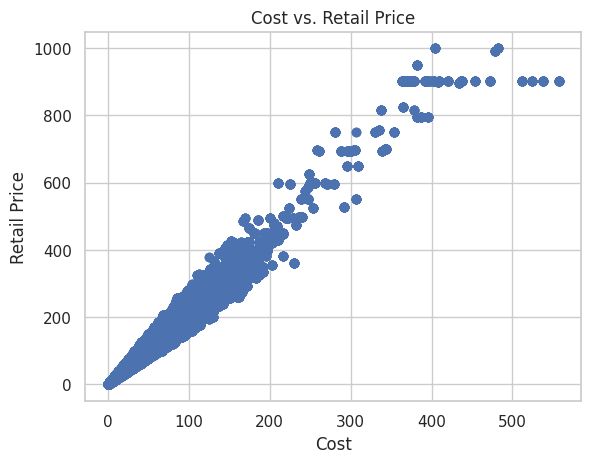

In [ ]:
#scatterplot for cost v retail price
plt.scatter(inventory_items['cost'], inventory_items['product_retail_price'])
plt.xlabel('Cost')
plt.ylabel('Retail Price')
plt.title('Cost vs. Retail Price')
plt.show()

In [ ]:
#showing profit with retail price minus item cost
inventory_items['profit'] = inventory_items['product_retail_price'] - inventory_items['cost']

#profit by category
profit_by_category = inventory_items.groupby('product_category')['profit'].sum()
print(profit_by_category)

product_category
Accessories                      6.651196e+05
Active                           7.259693e+05
Blazers & Jackets                4.512034e+05
Clothing Sets                    1.766254e+04
Dresses                          6.884177e+05
Fashion Hoodies & Sweatshirts    8.084966e+05
Intimates                        5.652496e+05
Jeans                            1.557345e+06
Jumpsuits & Rompers              5.484410e+04
Leggings                         9.409846e+04
Maternity                        3.864380e+05
Outerwear & Coats                2.006089e+06
Pants                            6.302392e+05
Pants & Capris                   2.441608e+05
Plus                             2.243497e+05
Shorts                           6.634027e+05
Skirts                           1.900123e+05
Sleep & Lounge                   7.675104e+05
Socks                            1.402829e+05
Socks & Hosiery                  9.902372e+04
Suits                            1.232566e+05
Suits & Sport Coa

<ipython-input-52-7143cd3ec429>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_profiting_categories.index, y=top_10_profiting_categories.values,palette='magma')


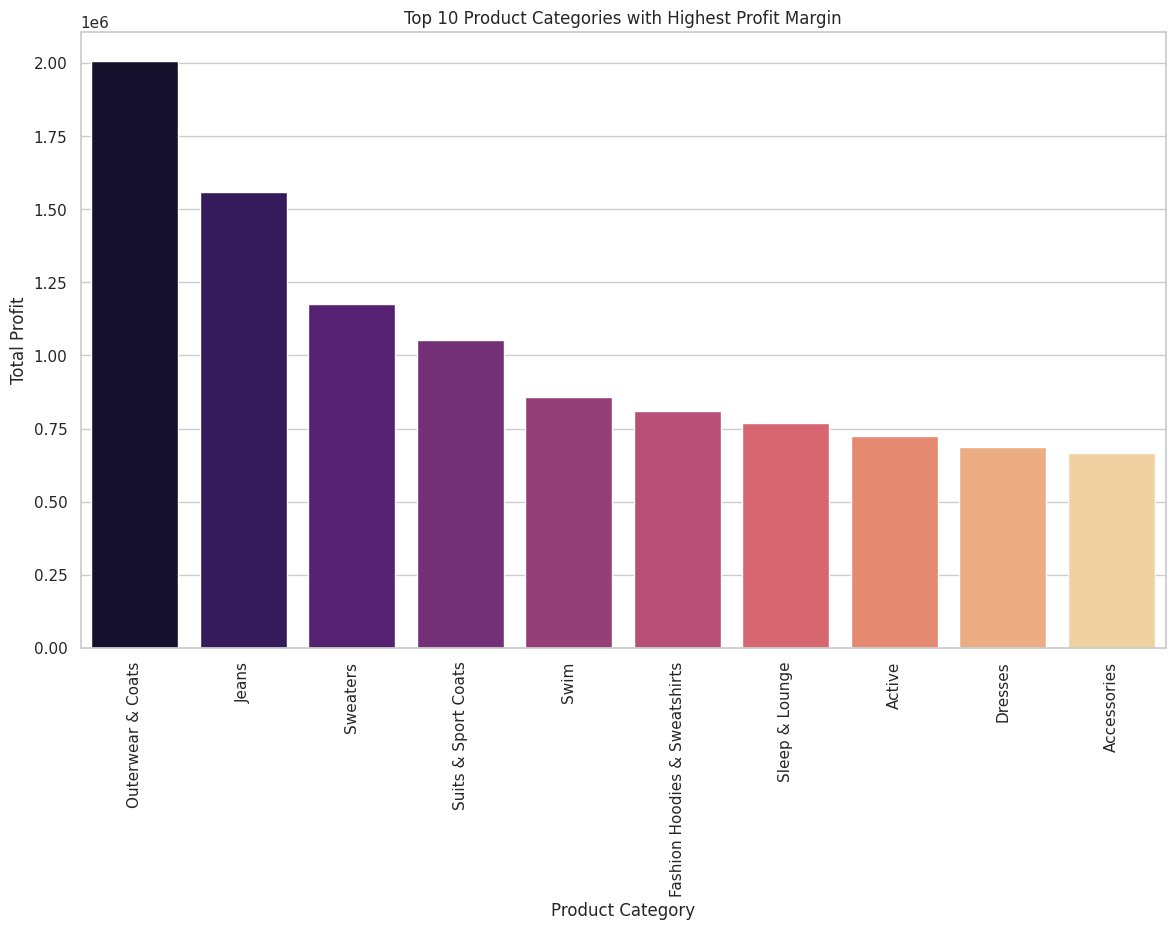

In [ ]:
#sorting categories by highest profit, descending order
top_10_profiting_categories = profit_by_category.sort_values(ascending=False).head(10)

#histogram for top 10 categories with highest profit margin
plt.figure(figsize=(14, 8))
sns.barplot(x=top_10_profiting_categories.index, y=top_10_profiting_categories.values,palette='magma')
plt.xticks(rotation=90)
plt.xlabel('Product Category')
plt.ylabel('Total Profit')
plt.title('Top 10 Product Categories with Highest Profit Margin')
plt.show()


In [ ]:
#profit by department
profit_by_department = inventory_items.groupby('product_department')['profit'].sum()
print(profit_by_department)

product_department
Men      7.998600e+06
Women    7.083254e+06
Name: profit, dtype: float64


Text(0, 0.5, 'Count')

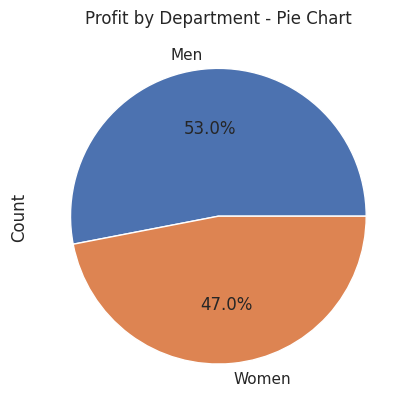

In [ ]:
#pie chart of profit by department
profit_by_department.plot(kind='pie', autopct='%1.1f%%')
plt.title("Profit by Department - Pie Chart")
plt.ylabel('Count')

In [ ]:
#brand data
inventory_items['product_brand'].value_counts()

,count
product_brand,
Allegra K,16726
Calvin Klein,8249
Carhartt,6760
Hanes,5120
Volcom,5000
...,...
Cowgirl Tuff,2
VH Apparel - Whatever It Takes Charity,2
Sperry Top-Sider,2


In [ ]:
#group product category by product brand
brands_by_category = inventory_items.groupby('product_category')['product_brand'].unique()
for category, brands in brands_by_category.items():
    print(f"Category: {category}")
    print(f"Brands: {', '.join(brands)}\n")

Category: Accessories
Brands: Funny Girl Designs, Perry, Belts.com, Marshal, TheTieBar, boxed-gifts, Dorfman Pacific, 180s, Touch Screen Gloves, 106Shades, DG Eyewear, Greatlookz, Body Wrappers, Kalon, MG, Private Island, Wayfarers, Vine Branch, AN1225, MyEyeglassCase, ASICS, Talitnia, Talitania, SK Hat shop, Baby Banz, Adventure Time, Buckle Down, FQH, Alexander Julian, Alki'i, ALL BLACK, Allegra K, Alpine Swiss, AmeriBag, American Apparel, King Formal Wear, Amicale, Angelina, Anne Klein, A:X Armani Exchange, Arnette, Tom Ford, Aviators, Aviator, Urban Boundaries Eyewear, Bailey, Bargain Headbands, Barmah Hats, Beardski, Luxury Divas, Victorian Heart Co. Inc., BeltsandStuds, ULTRAFINO PANAMA HAT, Betsey Johnson, Beza, Ivory Falcon, C.C. Exclusives, Y&G, Ties.com, Travelwell, K. Alexander, Aquapro, UniformTux, DECKY, CTM, Teramasu, Blancq-Olibet, blank apparel, Star, Blue Q, H2W, Boconi, Bosca, Brighton, Brixton, Broner, Brooks, Buff, Artex, Coloriffics, Bundle Monster, Bungalow, Buxto